# Correlacion Canonica
Consideremos $X \in \mathbb{R}^{n\times p}$ y $Y \in \mathbb{R}^{n\times q}$. Queremos hallar combinaciones lineales de las variables $X$ y $Y$ con la maxima correlacion. La importancia teórica de esta pregunta radica en que se pueden deducir otros métodos estadísticos de interés. 

1. Regresión multiple ($q=1$)
2. Analisis Discriminante ($Y$ categorica)
3. Analisis de Correspondencia ($X,Y$ categoricas). 

El objetivo del análisis de correlación canónica, es medir y visualizar el grado de correlación entre dos conjuntos de variables.

---
## Analisis espacial de frecuencia de alelos.
En este ejemplo esta basado en el paper 

*Messina F, et al. (2016) Spatially Explicit Models to Investigate Geographic Patterns in the Distribution of Forensic STRs: Application to the North-Eastern Mediterranean. PLoS ONE 11(11): e0167065.*

A continuacion visualizamos la base de datos, cada fila representa una observación de la frecuencia de ciertos alelos en una posición geográfica.

Queremos analizar si la frecuencia de los alelos depende de la posición geográfica. 

La muestra consiste de 41 observaciones de 16 STR en el locus D10S1248.

In [ ]:
#
# R script session S08 on canonical correlation analysis 
#

rm(list=ls())

X <- read.csv('Messina.csv')

head(X)

,NR,Sampling.location,Country.Island,Long.E,Lat.N,Sample.size..n..of.subjects.,A9,A11,A12,A13,A14,A15,A16,A17,A18,AC
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,Brno,Czech Rep. (Moravia),16.607,49.195,49,0,0.000,0.041,0.245,0.306,0.245,0.102,0.051,0.01,98
2,2,L'Aquila,Italy (Abruzzo),13.400,42.350,32,0,0.016,0.031,0.250,0.328,0.094,0.172,0.109,0.00,64
3,3,Avezzano,Italy (Abruzzo),13.426,42.028,28,0,0.000,0.018,0.250,0.321,0.232,0.143,0.036,0.00,56
4,4,Pescara,Italy (Abruzzo),14.216,42.462,18,0,0.056,0.083,0.333,0.278,0.139,0.111,0.000,0.00,36
5,5,Benevento,Italy (Campania),14.783,41.130,45,0,0.011,0.056,0.222,0.344,0.200,0.122,0.044,0.00,90
6,6,Foggia,Italy (Apulia),15.545,41.462,26,0,0.000,0.038,0.308,0.308,0.115,0.135,0.096,0.00,52


A cada uno de los paises identificados se les asocia un color.

In [ ]:
country <- substr(X$Country.Island,1,3)
n <- nrow(X)
colvec <- rep("black",n)
colvec[country=="Ita"] <- "green"
colvec[country=="Gre"] <- "blue"
colvec[country=="Tur"] <- "brown"
colvec[country=="Cze"] <- "red"
colvec[country=="Pal"] <- "black"

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

Visualizamos las posiciones geográficas (latitud,longitud) de las 41 observaciones correspondientes a 5 paises diferentes.

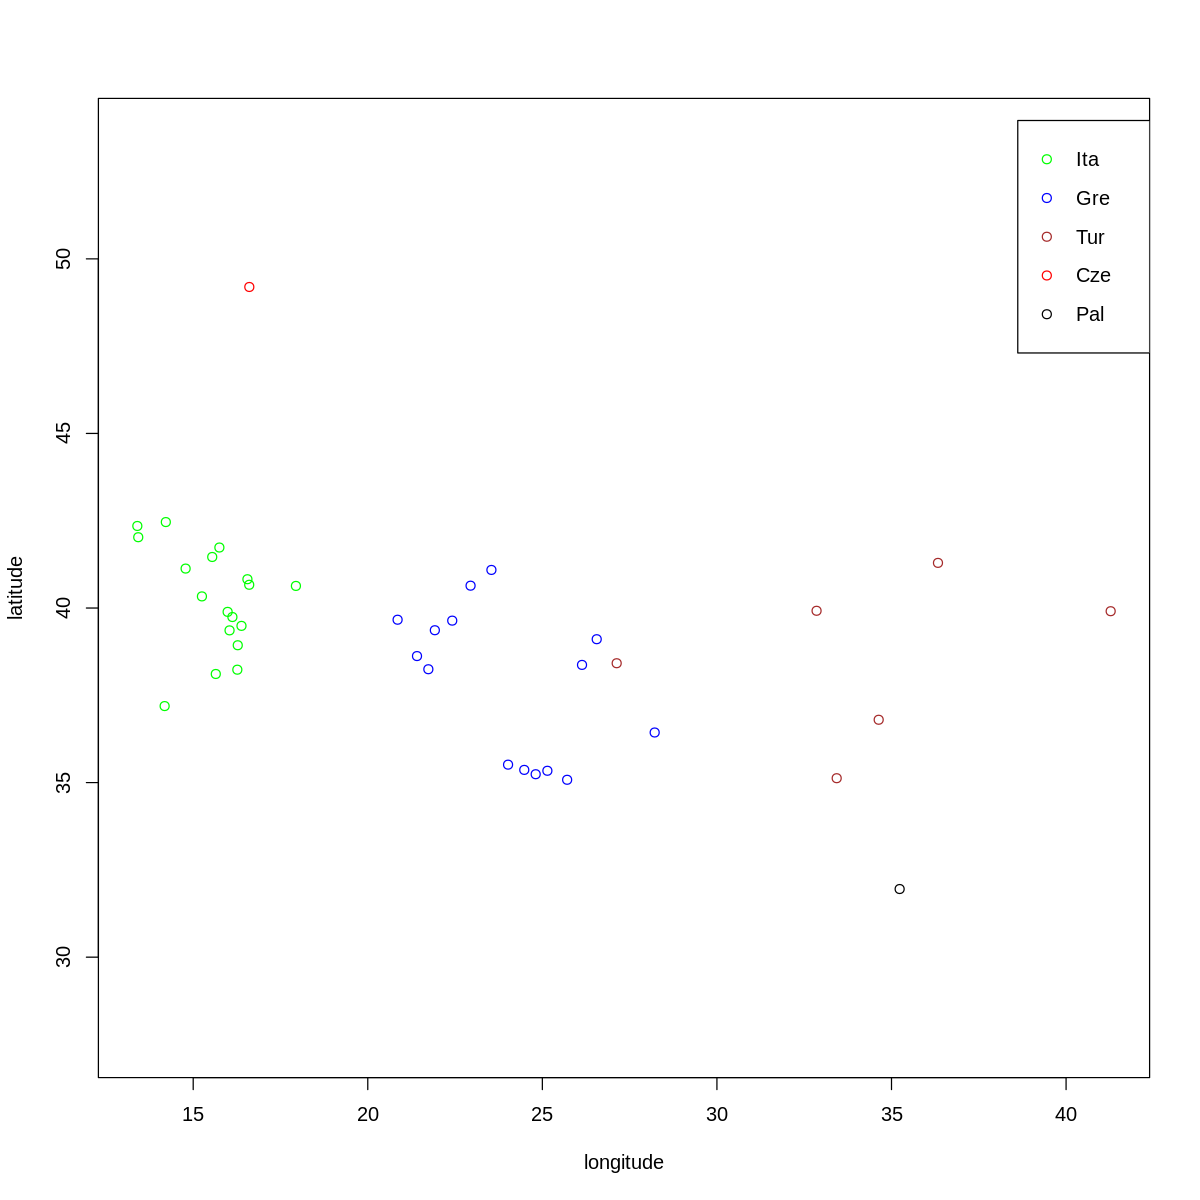

In [ ]:
#
# Geographical map
#
plot(X$Long.E,X$Lat.N,asp=1,xlab="longitude",ylab="latitude",col=colvec)
countries <- c("Ita","Gre","Tur","Cze","Pal")
legend("topright",countries,col=c("green","blue","brown","red","black"),pch=1)

In [ ]:
install.packages("ToolsForCoDa")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



A continuación consideramos un arreglo diferente de los datos evitando que la matriz de frecuencias de alelos sea demasiado sparse.

In [ ]:
library(ToolsForCoDa)

Xc <- scale(X[,4:5],scale=FALSE)
#head(Xc)
colnames(Xc) <- c("Long (E)","Lat (N)")

Y <- X[,(8:ncol(X)-1)]
#Y
#sum(Y==0)

Y <- Y/rowSums(Y)
#rowSums(Y)
#head(Y)

Yn <- cbind(Y[,1]+Y[,2]+Y[,3],Y[,4:7],Y[,8]+Y[,7])
#sum(Yn==0)

In [ ]:
install.packages("zCompositions")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘NADA’




Finalmente, debido a que los datos de frecuencia de alelos son datos compuestos procesdemos a quitar los 0s remanentes y a transformar los datos compuestos usando *center logratio*

In [ ]:
library(zCompositions)

Ym <- cmultRepl(Yn)
#head(Ym)
#head(Yn)

colnames(Ym)[1] <- "A9_11_12"
colnames(Ym)[ncol(Ym)] <- "A17_18"

Yclr <- clrmat(Ym)
head(Yclr)

No. adjusted imputations:  6 


A9_11_12,A13,A14,A15,A16,A17_18
0.3298999,0.03147657,-0.08702174,0.1416127,-0.25328004,-0.16268736
0.4000285,-0.01476768,-0.08404019,-0.8827977,0.20279467,0.37878244
-0.4408266,0.10415306,0.01330807,0.1395656,0.13706557,0.04673431
1.4460205,0.23357959,-0.28776699,-0.5299529,-0.27350391,-0.58837634
0.7264782,-0.16164652,-0.06450744,-0.1558704,-0.16877406,-0.17567975
0.2380263,0.24443047,-0.09639473,-0.6306011,0.01113426,0.23340476


Finalmente, procedemos a realizar el cálculo de los variables canónicas de X y Y.

In [ ]:
out <- canocov(Xc,Yclr)
out$ccor

0.3215959,0.0000000
0.0000000,0.2062223


A continuacion, esta es la matriz obtenida que considera los valores sigulares obtenidos, y por tanto el porcentaje explicado por cada uno de los componentes

In [ ]:
out$fitRxy

lamb,0.1034239,0.04252765
frac,0.7086180,0.29138198
cumu,0.7086180,1.00000000


Visualizamos las variables como las observaciones en haciendo una proyección al espacio de los primeros dos componentes canónicos 

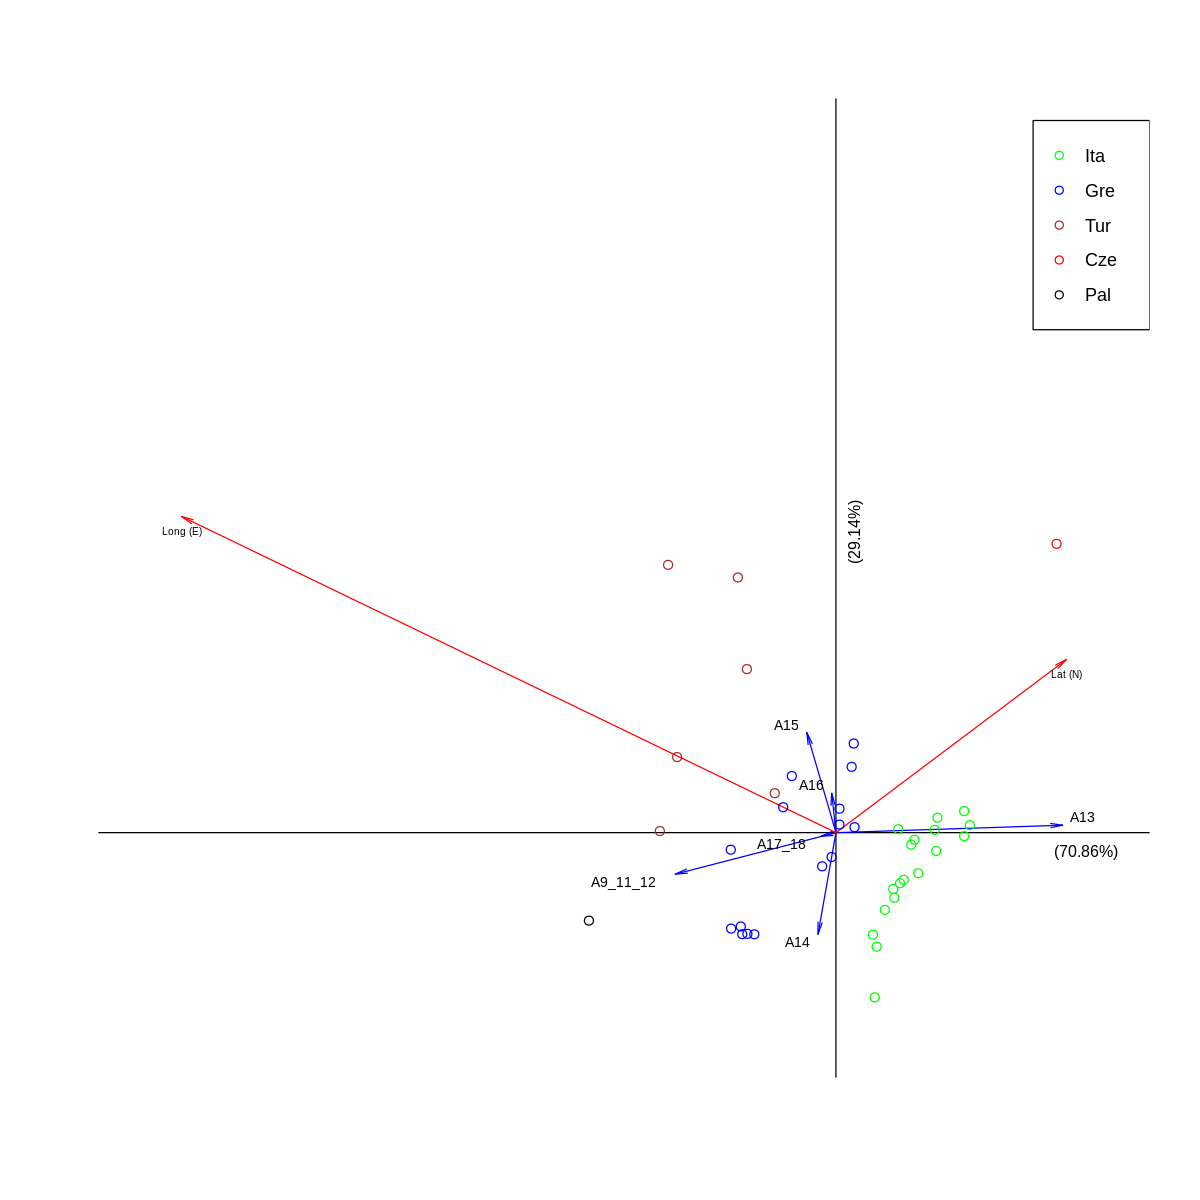

In [ ]:
bplot(out$Fs,25*out$Gp,rowarrow = TRUE,rowch=NA,colch=NA,rowlab = "",
      collab=colnames(Ym),cex.collab = 0.7)
text(out$Fs[,1],out$Fs[,2],colnames(Xc),cex=0.5,pos=1)

fa <- 1
Sa <- fa*out$U
points(Sa[,1],Sa[,2],pch=1,col=colvec)
legend("topright",countries,col=c("green","blue","brown","red","black"),
       pch=1,cex=0.9)

pct <- function(decom,di=1) {
  l1 <- paste("(",toString(round(100*decom[2,di],digits=2)),"%)",sep="")
  return(l1)
}


text(2.5,-0.2,pct(out$fitRxy),cex=0.8)
text(0.2,3,pct(out$fitRxy,2),cex=0.8,srt=90)

Hacemos una prueba de significancia para las correlaciones entre los componentes canonicos

In [ ]:
#
# Permutation test
# 

nsimul <- 10000

M <- matrix(NA,nrow=nsimul,ncol=2)
n
set.seed(123)
for(i in 1:nsimul) {
  index <- sample(n)
  Xc.scrambled <- Xc[index,]
  out.sim <- canocov(Xc.scrambled,Yclr)
  canvec <- diag(out.sim$ccor)
  M[i,] <- canvec
}
cc <- canvec
head(M)
dim(M)

[1] 41

0.3828873,0.1788418
0.4777650,0.2618358
0.3708918,0.1425180
0.3923313,0.1761479
0.3652052,0.2033690
0.4443511,0.2227202


[1] 10000     2

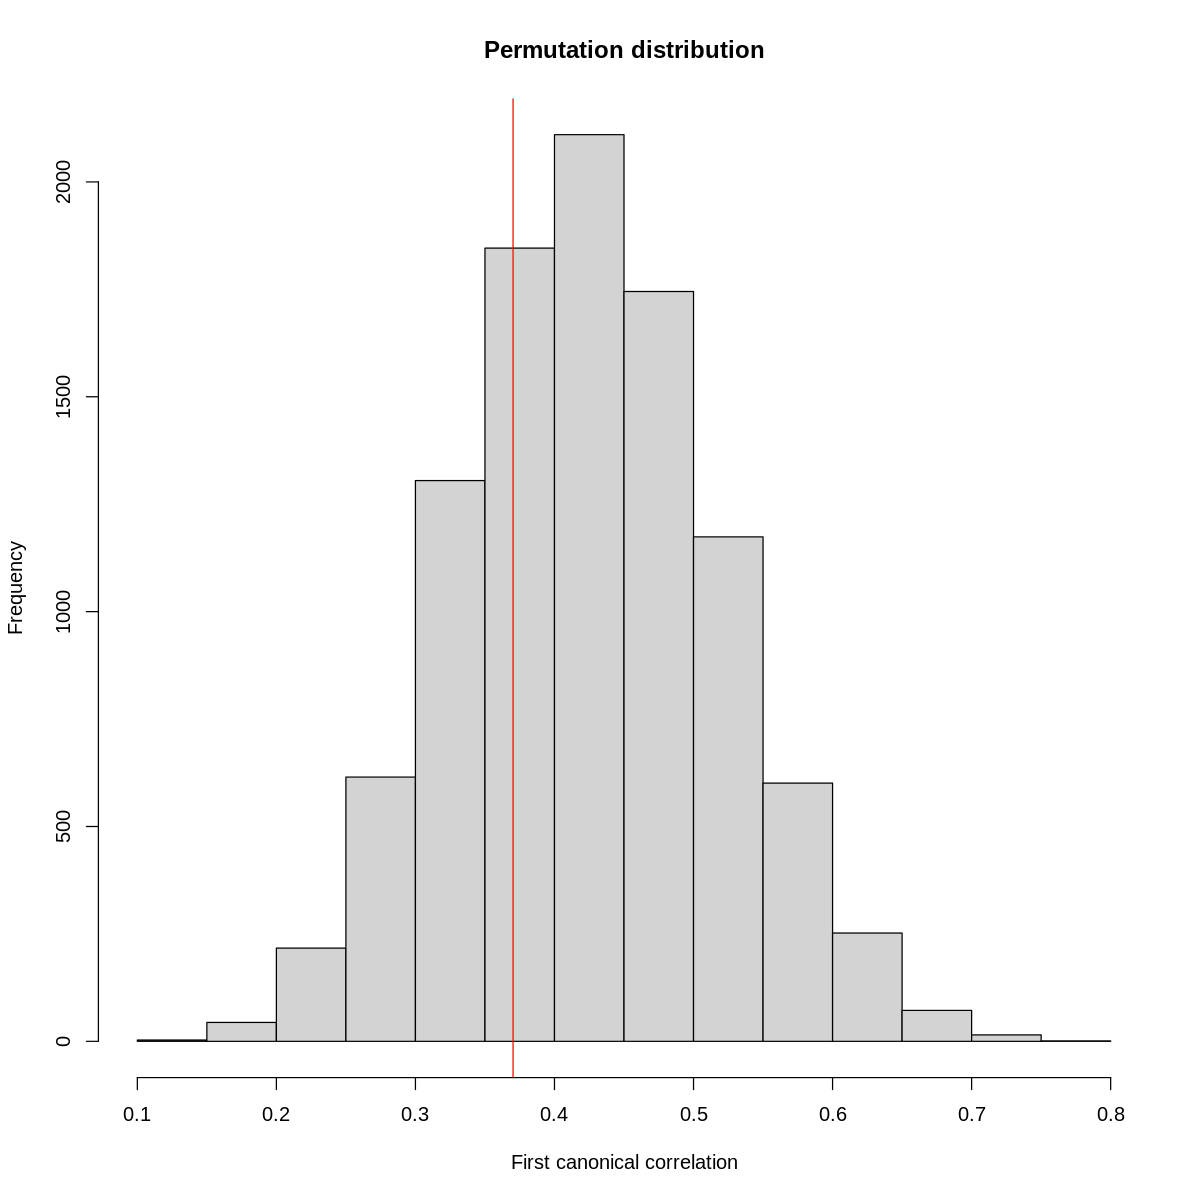

In [ ]:
hist(M[,1],main="Permutation distribution",xlab="First canonical correlation")
abline(v=cc[1],col="red")

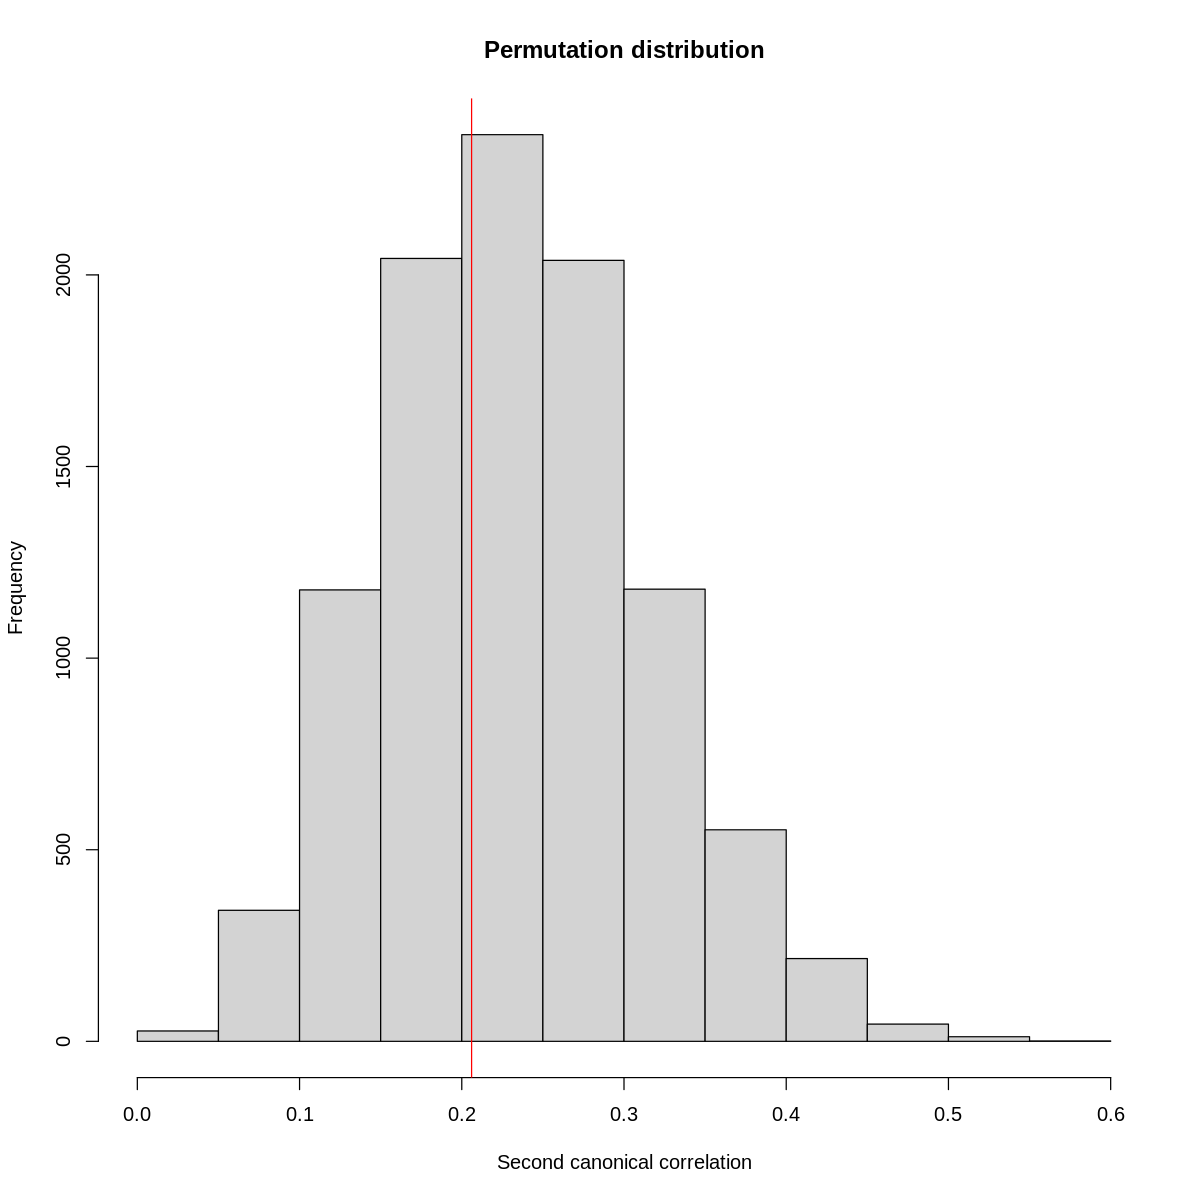

In [ ]:
hist(M[,2],main="Permutation distribution",xlab="Second canonical correlation")
abline(v=cc[2],col="red")

In [ ]:
# permutation p-values
pvals <- numeric(2)
for(i in 1:2) {
  pvals[i] <- sum(M[,i] >= cc[i])/nsimul
}
round(pvals,digits=10)

[1] 0.7107 0.6114